Data Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "F:\\Downloads\\archive (3)\\SCMS_Delivery_History_Dataset.csv"

try:
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except Exception as e:
    print(f"Error loading dataset: {e}")


Dataset loaded successfully!


In [3]:
# Display the first few rows
data.head()

# Display dataset information
print("\n--- Dataset Information ---")
data.info()

# Display basic statistics
print("\n--- Basic Statistics ---")
data.describe()
data.tail()
data
data.columns
data.dtypes


--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       1

ID                                int64
Project Code                     object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Vendor                           object
Item Description                 object
Molecule/Test Type               object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit of Measure (Per Pack)        int64
Line Item Quantity                int64


In [4]:
missing_values = data.isnull().sum()

# Display columns with missing values
print("\n--- Missing Values ---")
missing_values[missing_values > 0]



--- Missing Values ---


Shipment Mode                 360
Dosage                       1736
Line Item Insurance (USD)     287
dtype: int64

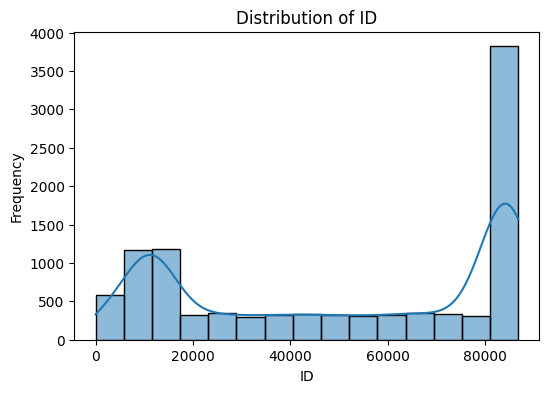

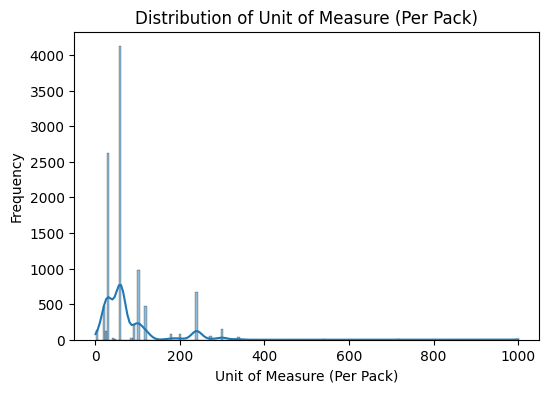

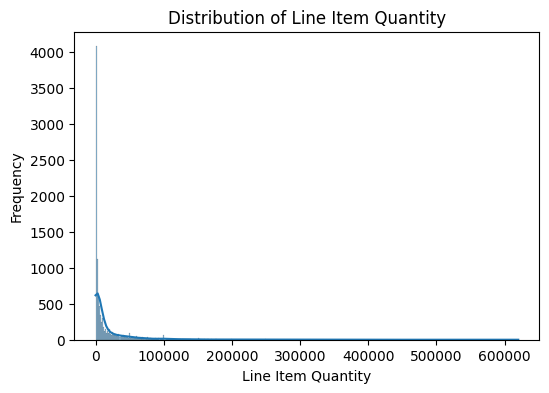

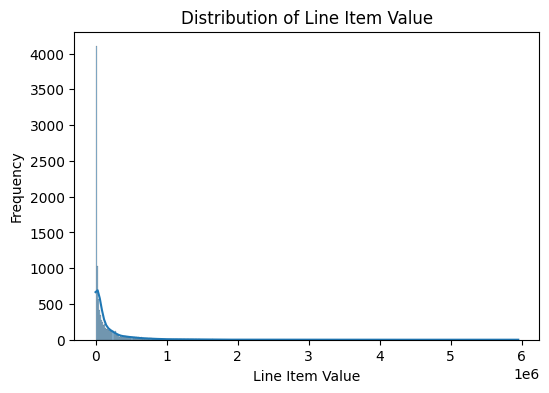

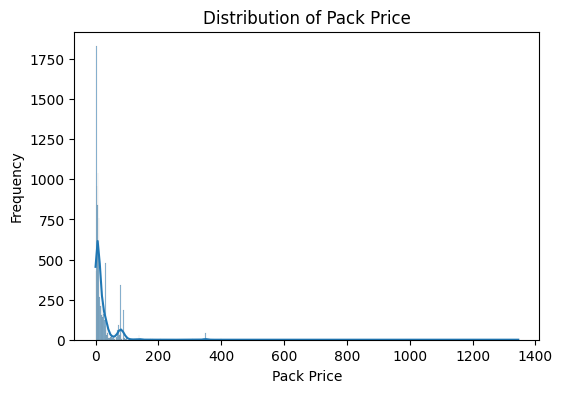

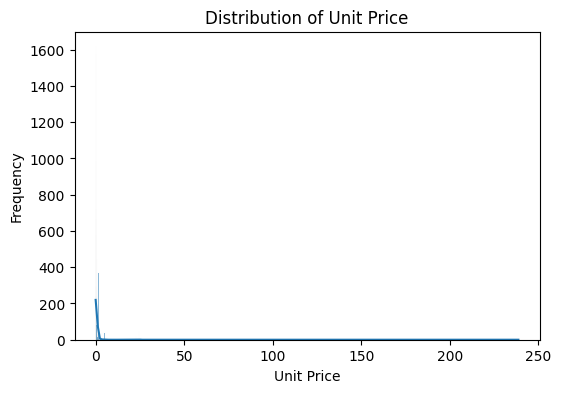

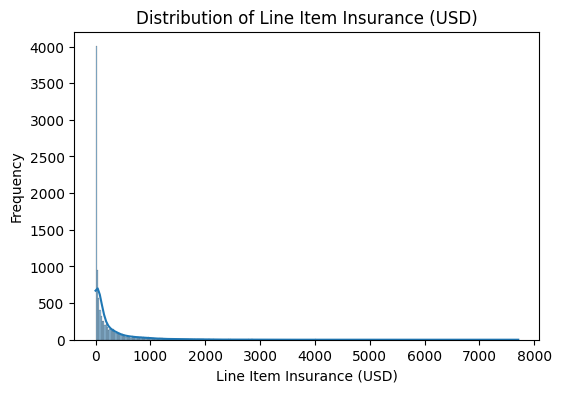

In [5]:
num_cols = data.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


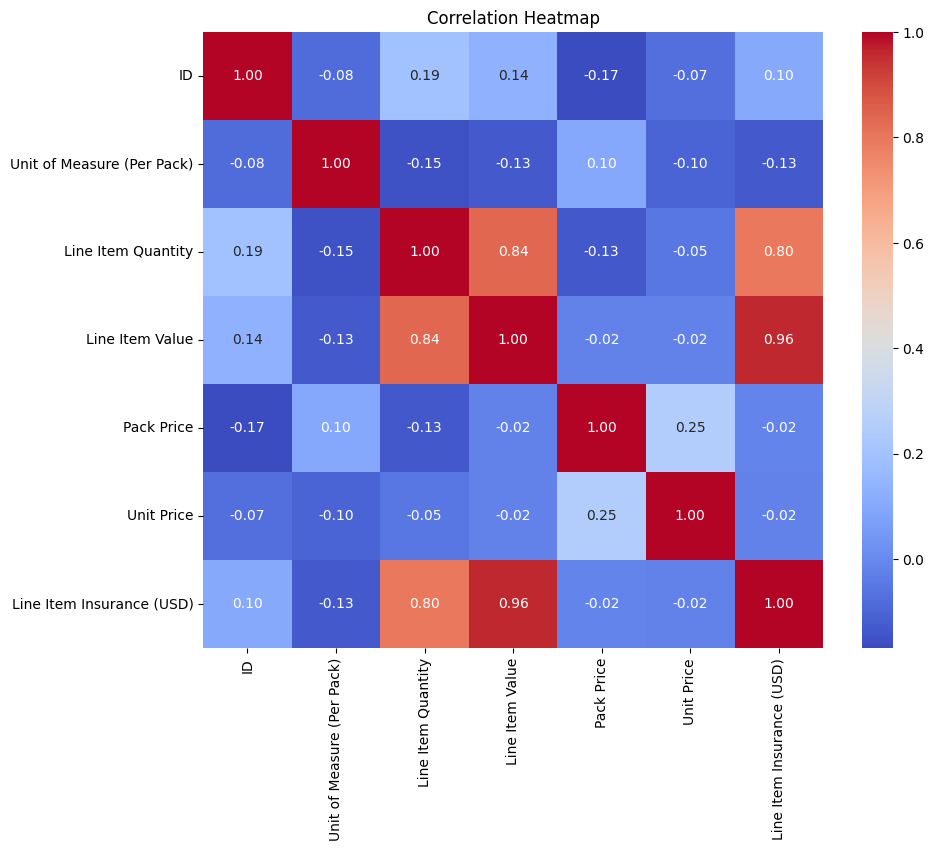

In [6]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

if not numeric_data.empty:
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()
else:
    print("No numeric columns available for correlation heatmap.")


In [7]:
cat_cols = data.select_dtypes(include='object').columns

for col in cat_cols:
    print(f"\n--- {col} ---")
    print(data[col].value_counts())



--- Project Code ---
Project Code
116-ZA-T30    768
104-CI-T30    729
151-NG-T30    628
114-UG-T30    596
108-VN-T30    522
             ... 
100-SN-T01      1
201-UG-T30      1
100-GN-T30      1
A02-SN-T50      1
104-SZ-T30      1
Name: count, Length: 142, dtype: int64

--- PQ # ---
PQ #
Pre-PQ Process    2681
FPQ-14942          205
FPQ-12522          154
FPQ-13973          110
FPQ-4537            98
                  ... 
FPQ-12933            1
FPQ-6823             1
FPQ-15736            1
FPQ-6128             1
FPQ-16523            1
Name: count, Length: 1237, dtype: int64

--- PO / SO # ---
PO / SO #
SCMS-199289    67
SCMS-199283    63
SCMS-183950    55
SCMS-215370    38
SCMS-259075    38
               ..
SCMS-260830     1
SCMS-283040     1
SCMS-149030     1
SCMS-234070     1
SO-51680        1
Name: count, Length: 6233, dtype: int64

--- ASN/DN # ---
ASN/DN #
ASN-19166    54
ASN-24415    38
ASN-23875    26
ASN-32138    19
ASN-28034    17
             ..
ASN-11200     1
ASN-23000 

Data Cleaning

In [8]:
def handle_missing_values(data):
    print("\n--- Handling Missing Values ---")
    missing_values = data.isnull().sum()
    print("Columns with missing values:")
    print(missing_values[missing_values > 0])

    # Drop columns with excessive missing values
    threshold = 0.5 * len(data)
    data = data.dropna(thresh=threshold, axis=1)
    print("\nColumns with excessive missing values dropped.")

    # Fill missing numerical columns with the median
    num_cols = data.select_dtypes(include=['float64', 'int64']).columns
    for col in num_cols:
        if data[col].isnull().sum() > 0:
            data[col] = data[col].fillna(data[col].median())
            print(f"Filled missing values in {col} with median.")

    # Fill missing categorical columns with the mode
    cat_cols = data.select_dtypes(include=['object']).columns
    for col in cat_cols:
        if data[col].isnull().sum() > 0:
            data[col] = data[col].fillna(data[col].mode()[0])
            print(f"Filled missing values in {col} with mode.")

    return data

data = handle_missing_values(data)



--- Handling Missing Values ---
Columns with missing values:
Shipment Mode                 360
Dosage                       1736
Line Item Insurance (USD)     287
dtype: int64

Columns with excessive missing values dropped.
Filled missing values in Line Item Insurance (USD) with median.
Filled missing values in Shipment Mode with mode.
Filled missing values in Dosage with mode.


In [9]:
def remove_duplicates(data):
    print("\n--- Removing Duplicates ---")
    before = len(data)
    data = data.drop_duplicates()
    after = len(data)
    print(f"Removed {before - after} duplicate rows.")
    return data

data = remove_duplicates(data)



--- Removing Duplicates ---
Removed 0 duplicate rows.


In [10]:
def enforce_data_types(data):
    import pandas as pd
    print("\n--- Ensuring Consistent Data Types ---")
    for col in data.columns:
        if data[col].dtype == 'object':
            try:
                # Explicitly handle conversion
                data[col] = pd.to_numeric(data[col], errors='coerce')  # Convert to numeric where possible
                print(f"Converted column '{col}' to numeric.")
            except Exception as e:
                print(f"Could not convert column '{col}': {e}")
    return data


In [11]:
def reset_index(data):
    print("\n--- Resetting Index ---")
    data = data.reset_index(drop=True)
    return data

data = reset_index(data)



--- Resetting Index ---


In [12]:
cleaned_file_path = "F:\\AI\\content\\SCMS_Cleaned_Dataset.csv"
data.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned data saved to '{cleaned_file_path}'.")



Cleaned data saved to 'F:\AI\content\SCMS_Cleaned_Dataset.csv'.


In [13]:
# Display the first few rows
data.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,47.04
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,47.04
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,47.04
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,47.04
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,47.04
